<p style="padding: 10px;
    background-color: #ccc;
    color: white;
    border: 1px solid #aaa;
    border-radius: 10p
    x;">Trình tự thực hiện thuật to<b>án: Ảnh -> Chuyển ảnh sang màu xám -> Thực hiện ngưỡng để lấy ảnh nhị phân -> Tiền xử lý ảnh để làm mịn đường viền -> Xác định các vùng hắc chắn nền, chắc chắn đối tượng và vùng chưa xác định -> Xây dựng maker -> Áp dụng thuật toán Water </b>

shed</p>

<h3>Một số kiến thức bổ sung</h3>

<h4>1. Ngưỡng Otsu (Otsu Threshold - Otsu’s binarization process)</h4>

Ngưỡng Otsu là một phương pháp hiệu quả trong việc phân chia hai lớp: foreground và background. 

Ngưỡng Otsu thường được sử dụng trong các trường hợp sau:
<ol>
    <li>
        Phân đoạn ảnh (Image Segmentation): Ngưỡng Otsu thường được sử dụng để phân đoạn ảnh thành các vùng foreground (tiền cảnh) và background (hậu cảnh). Đây là bước quan trọng trong nhiều ứng dụng như nhận diện đối tượng, phân tích y tế, và nhận diện ký tự quang học (OCR).
    </li>
    <li>
        Chuyển đổi ảnh xám thành ảnh nhị phân (Binarization): Phương pháp này đặc biệt hữu ích khi cần chuyển đổi một ảnh xám thành ảnh nhị phân, chẳng hạn như khi chuẩn bị ảnh cho các thuật toán nhận diện hoặc phân tích.
    </li>
</ol>

Ngưỡng Otsu hoạt động dựa trên nguyên tắc tối ưu hóa giữa các lớp (inter-class variance) của mức xám trong ảnh. Mục tiêu là tìm ra một ngưỡng giá trị 𝑡 mà tại đó độ lệch giữa các lớp (foreground và background) là lớn nhất. <br>

<img style="margin-left: 300px" src="https://nerophung.github.io/assets/img/2019-09-26-tim-hieu-otsu-threshold/Otsu's_Method_Visualization.gif" />

<p style="font-size: 16px">Nguyên lý hoạt động của ngưỡng Otsu có thể theo dõi trong <a href="http://www.labbookpages.co.uk/software/imgProc/otsuThreshold.html" >Bài viết về Otsu's Threshold</a></p>




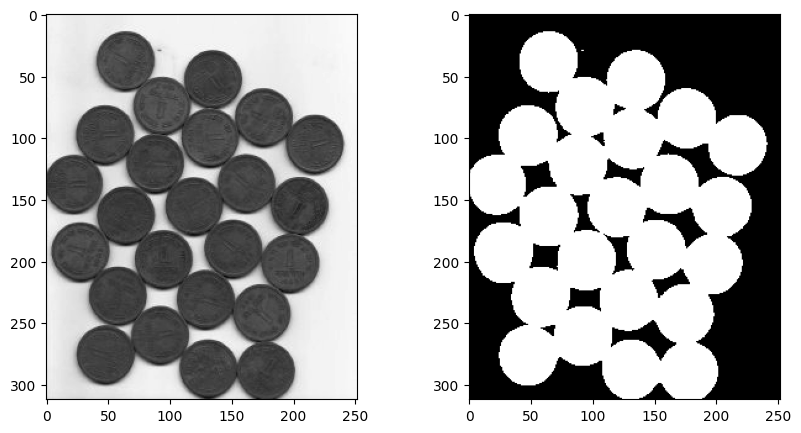

In [27]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('water_coins.jpg', cv2.IMREAD_GRAYSCALE)

# threshold(image, start_threshold, end_threshold, method (cv2.THRESH_BINARY_INV / cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.imshow(otsu_thresh, cmap='gray')
plt.show()

<h4>2. Morphological Gradient Processing</h4>

Morphological Gradient Processing là một kỹ thuật trong xử lý ảnh dùng để nhấn mạnh biên của các đối tượng trong ảnh. Có thể được sử dụng để giảm nhiễu ở đường biên. Morphological Gradient là sự khác biệt giữa phép giãn (dilation) và phép co (erosion) của một ảnh. Phép toán này làm nổi bật các biên của đối tượng bằng cách tính toán độ dày của biên:
<ul style="margin-left: 50px">
    <li>Dilation (giãn): Mở rộng các vùng sáng trong ảnh.</li>
    <li>Erosion (co): Thu nhỏ các vùng sáng trong ảnh.</li>
</ul>

Công thức để tính toán Morphological Gradient của một ảnh 𝐼 với một phần tử cấu trúc 𝑆 là: Gradient = Dilation(𝐼,𝑆) − Erosion(𝐼,𝑆)

Trong đó: <ul>
    <li>
        Dilation(𝐼,𝑆) là ảnh sau khi áp dụng phép giãn.<br>
        Một pixel 𝑥 trong ảnh kết quả 𝐷(𝐼) sẽ được gán giá trị: 𝐷(𝐼)(𝑥) = max⁡(𝑦∈𝑆) 𝐼(𝑥+𝑦) --> D(I)=I⊕S
        Trong đó 𝑦 là các pixel trong vùng lân cận được xác định bởi phần tử cấu trúc 𝑆.
    </li>
    <li>
        Erosion(𝐼,𝑆) là ảnh sau khi áp dụng phép co.<br>
        Một pixel 𝑥 trong ảnh kết quả E(𝐼) sẽ được gán giá trị: E(𝐼)(𝑥) = min⁡(𝑦∈𝑆) 𝐼(𝑥-𝑦) --> E(I)=I⊖S
        Trong đó 𝑦 là các pixel trong vùng lân cận được xác định bởi phần tử cấu trúc 𝑆.
    </li>
    <li>
        Phần tử cấu trúc S là một ma trận nhỏ, thường là ma trận nhị phân, được sử dụng để định nghĩa vùng lân cận của mỗi pixel trong ảnh gốc khi thực hiện các phép toán hình thái học. Các giá trị trong phần tử cấu trúc xác định cách thức các pixel lân cận được xét đến trong các phép toán này.
    </li>
        </ul>
        
Morphological Gradient Processing được sử dụng trong nhiều ứng dụng xử lý ảnh như:
<ul>
   <li>Phát hiện biên: Nhấn mạnh các đường biên của đối tượng trong ảnh.</li> 
    <li>Phân đoạn ảnh: Chuẩn bị cho các bước xử lý tiếp theo như phân đoạn đối tượng.</li>
    <li>Xử lý tiền xử lý: Làm sạch và cải thiện chất lượng ảnh trước khi áp dụng các thuật toán phức tạp khác.</li>
</ul>


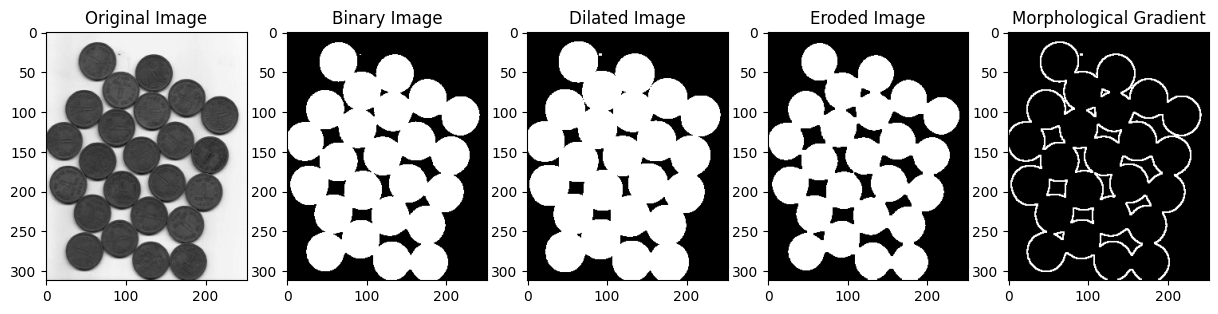

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển đổi sang ảnh nhị phân
image = cv2.imread('water_coins.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Tạo phần tử cấu trúc (kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Tính toán Dilation và Erosion
dilated = cv2.dilate(binary_image, kernel)
eroded = cv2.erode(binary_image, kernel)

# Tính toán Morphological Gradient
gradient = cv2.morphologyEx(binary_image, cv2.MORPH_GRADIENT, kernel)

# Hiển thị kết quả
plt.figure(figsize=(15, 6))

plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 5, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 5, 3)
plt.title('Dilated Image')
plt.imshow(dilated, cmap='gray')

plt.subplot(1, 5, 4)
plt.title('Eroded Image')
plt.imshow(eroded, cmap='gray')

plt.subplot(1, 5, 5)
plt.title('Morphological Gradient')
plt.imshow(gradient, cmap='gray')

plt.show()

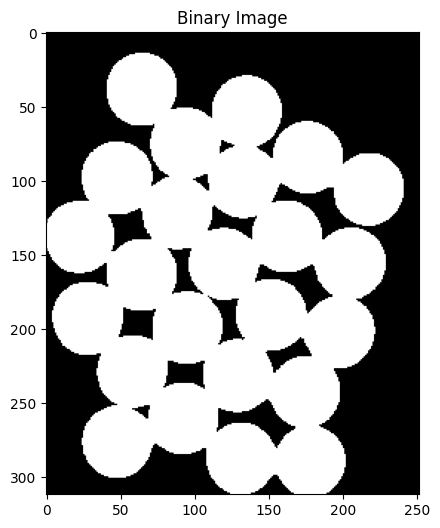

In [37]:
## Tổng hợp
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển đổi sang ảnh nhị phân
image = cv2.imread('water_coins.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Tạo phần tử cấu trúc (kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# Tính toán Morphological Gradient
binary_image = cv2.morphologyEx(binary_image, 
                           cv2.MORPH_OPEN,
                           kernel,
                           iterations=2)

plt.figure(figsize=(6, 6))
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')

<h3>Detecting the black background and foreground of the image</h3>

Ở bước này, chúng ta sẽ xác định khu vực chắc chắn là background, khu vực chắc chắc là foreground và khu vực không xác định
<ul>
    <li>Khu vực chắc chắn là background được xác định dựa vào hàm dilate để mở rộng vùng sáng trong ảnh</li>
    <li>Khu vực chắc chắc là foreground: sử dụng hàm distanceTransform để tính khoảng cách từ mỗi pixel trắng đến pixel đen gần nhất thu vào mảng dist và lấy ngưỡng phụ thuộc vào mảng dist - chẳng hạn ngưỡng là 0.5*max(dist), các pixel trắng có dist lớn hơn ngưỡng sẽ thuộc vào khu vực chắc chắn là foreground</li>
    <li>Khu vực chưa xác định sử dụng hàm subtract: lấy hiệu giữa khu vực background chắc chắn và khu vực foreground chắc chắn</li>
</ul>


(312, 252)
(312, 252)


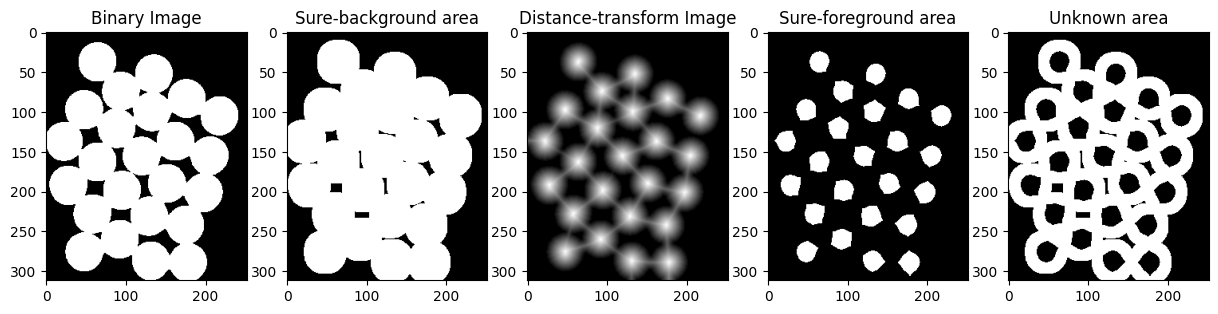

In [40]:
# Khu vực chắc chắn là nền
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
sure_bg = cv2.dilate(binary_image, kernel, iterations=3) # thực hiện 3 lần giãn nở
sure_bg = sure_bg.astype(np.uint8)  

# Tính toán khoảng cách 
dist = cv2.distanceTransform(binary_image, cv2.DIST_L2, 5) # 5 là kthước mặt nạ(5x5). DIST_L2: K/c Euclid, DIST_l1: K/c Manhattan, DIST_C: K/c Chebyshev

# Khu vực chắc chắn là foreground
ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)  

print(sure_bg.shape)
print(sure_fg.shape)

# Khu vực chưa xác định
unknown = cv2.subtract(sure_bg, sure_fg)

# Hiển thị kết quả
plt.figure(figsize=(15, 6))

plt.subplot(1, 5, 1)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 5, 2)
plt.title('Sure-background area')
plt.imshow(sure_bg, cmap='gray')

plt.subplot(1, 5, 3)
plt.title('Distance-transform Image')
plt.imshow(dist, cmap='gray')

plt.subplot(1, 5, 4)
plt.title('Sure-foreground area')
plt.imshow(sure_fg, cmap='gray')

plt.subplot(1, 5, 5)
plt.title('Unknown area')
plt.imshow(unknown, cmap='gray')

plt.show()

<h3>Creating marker image</h3>

Bước này ta thực hiện gán nhãn cho các vùng liên thông trong ảnh sure-foreground, mỗi vùng một nhãn. Các pixel và nhãn này được gọi là các makers, mỗi pixel trong một thành phần liên thông có cùng một nhãn. Để phân biệt rõ giữa nền và đối tượng, giá trị của các thành phần trong markers được tăng lên 1. Điều này giúp đảm bảo rằng nền sẽ có nhãn khác với các thành phần đối tượng.

Các khu vực chưa xác định trong maker được gán giá trị 0

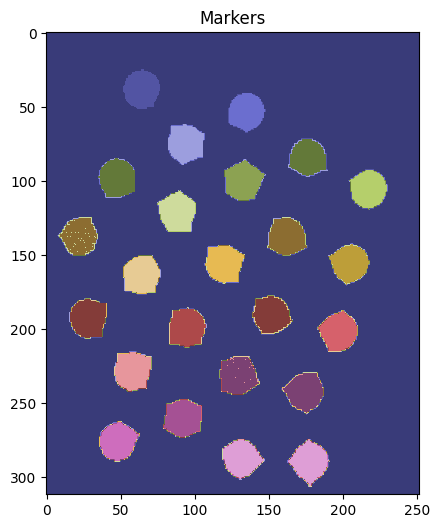

In [41]:
# có 3 kiểu vùng: vùng chắc chắn nền được gán là 0, các vùng chưa xác định được gán 1 giá trị nào đó và mỗi vùng chắc chắc là đối tượng được gán các nhãn 
ret, markers = cv2.connectedComponents(sure_fg)

# bước này thì sure_bg thành 1, sure_fg cộng thêm 1
markers = markers + 1

# bước này thì chuyển unknown thành 0
markers[unknown == 255] = 0

plt.figure(figsize=(6, 6))
plt.imshow(markers, cmap='tab20b')
plt.title('Markers')
plt.show()

<h3>Applying Watershed Algorithm to Markers</h3>

Ở bước này, ta áp dụng thuật toán Watershed với ảnh đầu vào và makers được xây dựng ở bước trước. Sau đó, duyệt qua các nhãn bắt đầu từ 2 để findContour và drawContour cho mỗi nhãn. 

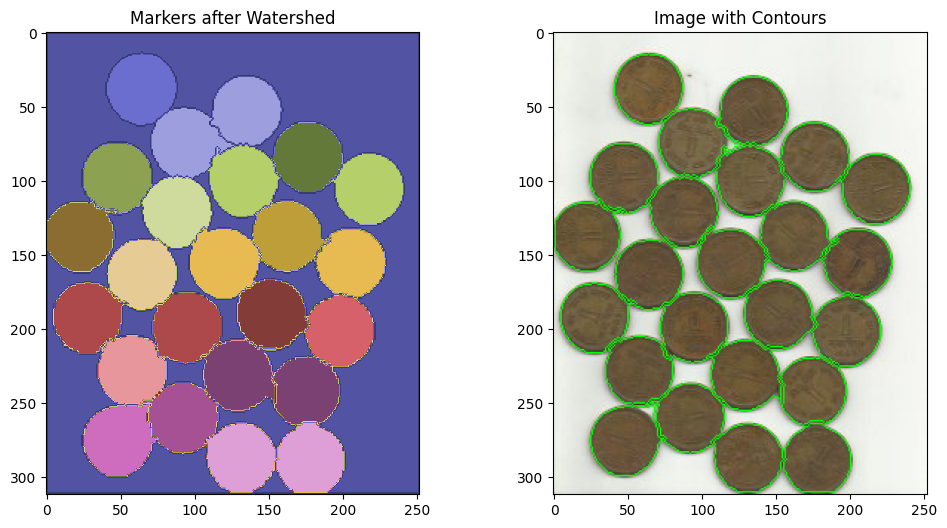

In [42]:
image_original = cv2.imread('water_coins.jpg')

# Áp dụng thuật toán Watershed cho ảnh gốc với makers
markers = cv2.watershed(image_original, markers)

# Hiển thị ảnh markers sau khi áp dụng Watershed
plt.figure(figsize=[12,6])
plt.subplot(121)
plt.imshow(markers, cmap='tab20b')
plt.title('Markers after Watershed')

# Duyệt qua các nhãn bắt đầu từ 2 để tìm đường viền cho các nhãn
coins = []
for label in range(2, np.max(markers) + 1):
    # Tạo mặt nạ nhị phân cho từng nhãn
    mask = np.zeros(markers.shape, dtype=np.uint8)
    mask[markers == label] = 255

    # Tìm các đường viền
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        coins.append(contours[0])

# Vẽ đường viền các đối tượng lên ảnh gốc
cv2.drawContours(image_original, coins, -1, (0, 255, 0), 1)

# Hiển thị ảnh gốc với các đường viền được vẽ
plt.subplot(122)
plt.imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.show()